## 5. 线性回归(linear_regression)

### 5.1 一元线性回归
$l = \sum_{i=1}^{N} (wx_i + b - y_i)^2$
手推后得到:  
$ w = \frac {\overline{xy} - \bar{x}\bar{y}} {\bar{x^2}  - {\bar{x}}^2 }$  
$ b = \bar{y} - w\bar{x}$  

(10,) (10,)
通过手动实现的线性回归模型参数: 0.57576 -38.07879
基于sklearn的线性回归模型参数：0.57576 -38.07879


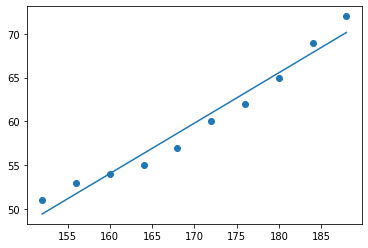

In [27]:
# 创建数据集，把数据写入到numpy数组
import numpy as np  # 引用numpy库，主要用来做科学计算
import matplotlib.pyplot as plt   # 引用matplotlib库，主要用来画图
data = np.array([[152,51],[156,53],[160,54],[164,55],
                 [168,57],[172,60],[176,62],[180,65],
                 [184,69],[188,72]])

# 打印大小
x, y = data[:,0], data[:,1]
print (x.shape, y.shape)

x_mean = np.mean(x)
y_mean = np.mean(y)
x2_mean = np.mean(x**2)
xy_mean = np.mean(x*y)

# 1. 手动实现一个线性回归算法，具体推导细节参考4.1课程视频
# TODO: 实现w和b参数， 这里w是斜率， b是偏移量
w = (xy_mean  - x_mean * y_mean)/(x2_mean - np.square(x_mean))
b = y_mean - w * x_mean

print ("通过手动实现的线性回归模型参数: %.5f %.5f"%(w,b))

# 2. 使用sklearn来实现线性回归模型, 可以用来比较一下跟手动实现的结果
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x.reshape(-1,1),y)
print ("基于sklearn的线性回归模型参数：%.5f %.5f"%(model.coef_, model.intercept_)) # W b

plt.scatter(x,y)
plt.plot(x,x*w + b)
plt.show()

### 5.2 多元线性回归
**张量：**简单地说，可以把张量看作是多个矩阵的叠加。
向量的**范数(Vector Norm)：** 指一个针对向量的操作。  
L2范数：$||X||_2 = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$  
$||X||_2^2 = x_1^2 + x_2^2 + \dots + x_n^2$
N个样本， d个特征  
$l = \sum_{i=1}^{N} (\sum_{j=1}^d{w_jx_{ij}} + b - y_i)^2$    
![image.png](wMatrix.png)

$w_0*1= b$  
$\frac {\partial l}{\partial w}$ 求导后，得
$w = (X^TX)^{-1}X^Ty$  
这里存在一个问题$(X^TX)^{-1}$不能保证满秩，所以不能保证其存在逆矩阵。通常的解决方法是：  
- 把线性相关的特征去掉，保证数据中不会出现线性相关的特征
- 在$(X^TX)^{-1}$的基础上加一个单位矩阵  
$w = (X^TX + \lambda I)^{-1}X^Ty$  在原有信息上添加了一个噪声，但是确保了逆矩阵的存在.  
**注意:** 添加的$\lambda I$项作为噪声，$\lambda$应该尽肯能的小。

In [16]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression

# 生成样本数据， 特征维度为2
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3

# 先使用sklearn自带的库来解决
model = LinearRegression().fit(X, y)

# 打印参数以及偏移量（bias）
print ("基于sklearn的线性回归模型参数为 coef: ", model.coef_, " intercept: %.5f" %model.intercept_) # W b

# TODO: 动手实现多元线性回归的参数估计, 把最后的结果放在res变量里。 res[0]存储的是偏移量，res[1:]存储的是模型参数
X = np.insert(X, 0, values=1, axis=1)
XT = np.transpose(X)
#W = np.random.rand(3,1)
W = np.ones([3,1],dtype=float)
# y = np.transpose(y)  #一维的

inv = np.linalg.inv(XT.dot(X) + 0.001*np.eye(3))
res = inv.dot(XT).dot(y)

# 打印参数以偏移量（bias）
print ("通过手动实现的线性回归模型参数为 coef: ", res[1:], " intercept: %.5f"%res[0])

基于sklearn的线性回归模型参数为 coef:  [1. 2.]  intercept: 3.00000
通过手动实现的线性回归模型参数为 coef:  [1.00298829 2.00049937]  intercept: 2.99377


### 5.3 线性回归模型的矩阵表示法
**线性回归的最小二乘法是基于误差为高斯分布的假设得来的**  
线性回归的误差模型：$y = w^TX + b + e$  
基于所有样本的最大似然(Maximum Likelihood)
    